In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

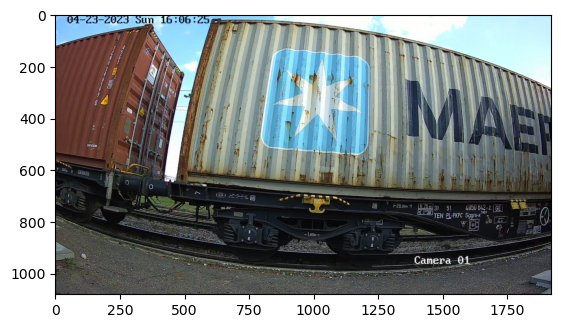

In [137]:
image_path = "resources/klatka.png"
image = np.asarray(Image.open(image_path))

plt.imshow(image)

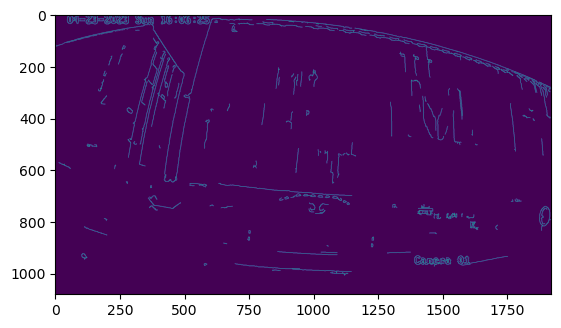

In [138]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel_size = (9, 9)  # im większy tym większe rozmycie
blurred_image = cv2.GaussianBlur(gray_image, kernel_size, cv2.BORDER_DEFAULT)

threshold_lower, threshold_upper = 50, 150
aperture_size = 3
edges_image = cv2.Canny(
    blurred_image, threshold_lower, threshold_upper, apertureSize=aperture_size
)

plt.imshow(edges_images)

In [139]:
def draw_lines(img, houghLines, color=(0, 255, 0), thickness=2):
    img = np.copy(img) 

    for line in houghLines:
        for rho, theta in line:

            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho

            x1 = int(x0 + 1920 * (-b))
            y1 = int(y0 + 1080 * (a))
            x2 = int(x0 - 1920 * (-b))
            y2 = int(y0 - 1080 * (a))

            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

    return img

def display_multiple_images(*images):
    for index, image in enumerate(images, start=1):
        plt.figure()
        plt.imshow(image)

def draw_linesP(img, houghLines, color=(0, 255, 0), thickness=2):
    img = np.copy(img) 

    for line in houghLines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), color, thickness)

    return img


found: 9 lines


<Figure size 200x200 with 0 Axes>

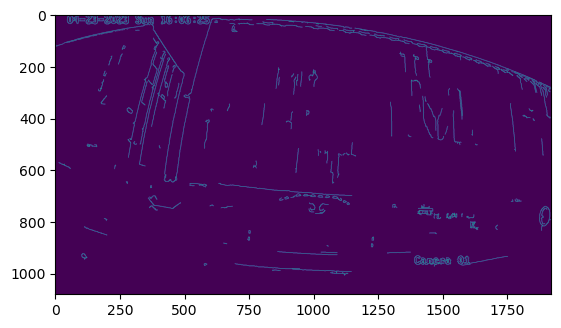

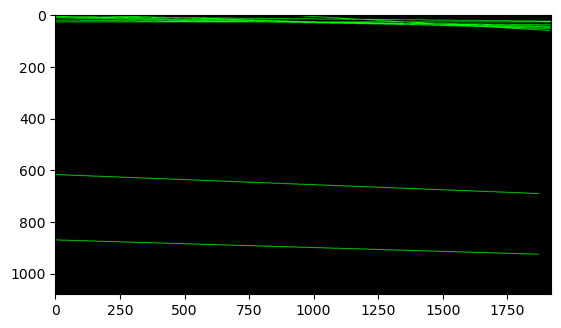

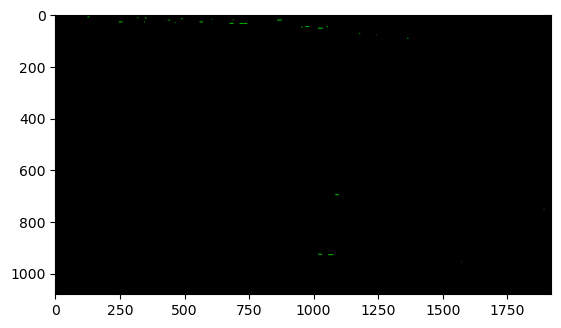

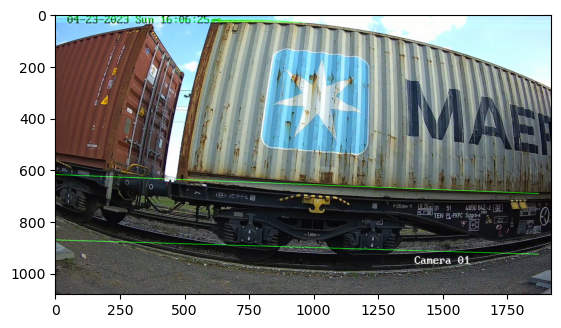

In [140]:
rho_resolution = 1 # 1 pixel 
theta_resolution = np.pi / 180 # 1 radian
threshold = 150

hough_lines = cv2.HoughLines(edges_image, rho_resolution, theta_resolution, threshold)
hough_linesP = cv2.HoughLinesP(edges_image, rho_resolution, theta_resolution, threshold)
print(f"found: {len(hough_lines)} lines")

empty_image = np.zeros_like(image)
lines_image = draw_lines(empty_image, hough_lines)
lines_imageP = draw_linesP(empty_image, hough_linesP)

alfa, beta = (1, 0.8)
original_image_with_lines = cv2.addWeighted(image, alfa, lines_image, beta, 0)

# display
figure = plt.figure(figsize=figure_shape)
display_multiple_images(edges_image, lines_image, lines_imageP, original_image_with_lines)

In [141]:
hough_lines

array([[[  0.       ,   1.6231562]],

       [[ 30.       ,   1.5707964]],

       [[871.       ,   1.6231562]],

       [[ 23.       ,   1.5882496]],

       [[ 10.       ,   1.6057029]],

       [[  9.       ,   1.5882496]],

       [[-50.       ,   1.6755161]],

       [[ 14.       ,   1.6057029]],

       [[619.       ,   1.6406095]]], dtype=float32)